# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

## Importamos las librerías que vamos a utilizar

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

## Leemos nuestro archivo de entrada `reviews_sentiment`

In [26]:
df = pd.read_csv(R'data\reviews_sentiment.csv', ';')

C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [27]:
df

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393


In [28]:
df = df[['wordcount','sentimentValue','Star Rating']]

Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

## Rápidas visualizaciones y análisis
Al menos realiza un análisis univariante y representa la distribución del rating

<AxesSubplot:xlabel='wordcount', ylabel='sentimentValue'>

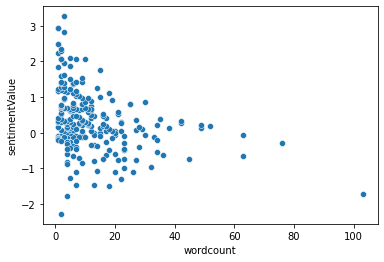

In [29]:
sns.scatterplot(x='wordcount', y ='sentimentValue', data=df)

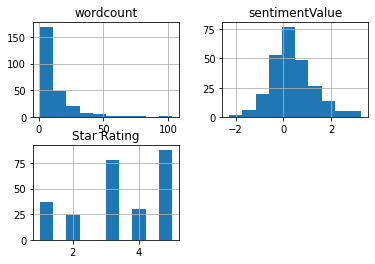

In [30]:
	
df.hist()
plt.show()

<AxesSubplot:>

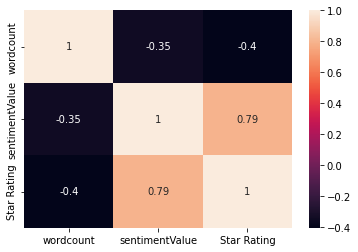

In [31]:
sns.heatmap(df.corr(),annot=True)

In [32]:
1
print(df.groupby('Star Rating').size())

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


## Preparamos el dataset
Divide en train/test y escala las features en el rango [0, 1].

In [33]:
X = df[['wordcount','sentimentValue']].values
y = df['Star Rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creamos el Modelo
Entrena con un KNN y evalúa el error en train y en test

In [34]:

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
   

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.87


## Resultados obtenidos
Matriz de confusión

In [35]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))

[[ 5  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  1 15  0  1]
 [ 0  0  2  7  0]
 [ 0  0  3  0 17]]


## ¿Cómo obtener el mejor valor de k?
¿Qué valor de k maximiza el accuracy? Representa todas las iteraciones en un scatterplot -> k vs accuracy

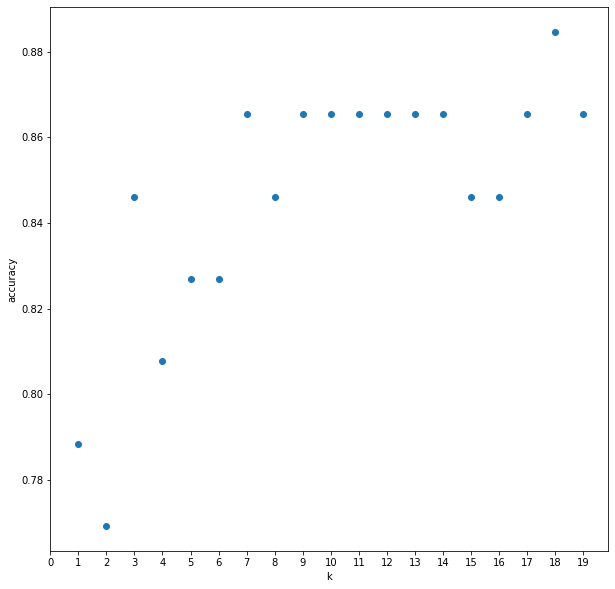

In [36]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure(figsize=(10,10))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,20));

## Predicciones
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1

In [37]:
eje = pd.DataFrame({'wordcount':[5], 'sentimentValue':[1]})

In [39]:
knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(X_train, y_train)

knn.predict(eje)

C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([2], dtype=int64)